In [206]:
#importing required modules
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score, precision_score, recall_score
import matplotlib
from keras.callbacks import ModelCheckpoint


In [207]:
data = pd.read_csv('musk_csv.csv')  #importing data

In [208]:
data.head() 


,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


In [209]:
# data preprocessing steps.

data.isna().sum() #checking all missing values if any.

ID                   0
molecule_name        0
conformation_name    0
f1                   0
f2                   0
                    ..
f163                 0
f164                 0
f165                 0
f166                 0
class                0
Length: 170, dtype: int64

In [210]:
# Create correlation matrix 
corr_matrix = data.corr().abs()

# Select upper triangle of correlation matrix
Utri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.92
to_drop = [column for column in Utri.columns if any(Utri[column] > 0.92)]

In [211]:
df = data.drop(columns = to_drop) # dropping  columns that are less importatnt. 

In [212]:
df.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


In [213]:
#building train test sets .
train,test = train_test_split(df, random_state=30, test_size = 0.2)
Xtrain = train.iloc[:,3:-1]
Ytrain = train.iloc[:,116:117]
Xtest = test.iloc[:,3:-1]
Ytest = test.iloc[:,-1:]
print(Xtrain.shape)
print(Ytrain)
print(Xtrain)

(5278, 113)
      class
6256      0
5710      0
3061      0
5888      0
1015      1
...     ...
5260      0
500       1
3885      0
4517      0
5925      0

[5278 rows x 1 columns]
      f1   f2   f3   f4   f5   f6   f7  f8   f9  f10  ...  f157  f158  f159  \
6256  63 -170   27  -27 -109   39  -97  98 -208  -12  ...  -246  -272    60   
5710  41   27   19  -86 -115   59 -166  64 -218   13  ...  -213  -131    44   
3061  47 -198 -128   44  -89  100  -46   6   13 -155  ...  -226  -268  -210   
5888  43   66   38   68 -117   76 -165  49 -230   -9  ...  -245  -195    39   
1015  30 -113  -22  -63 -117   61 -164  29 -236  -22  ...  -242  -174    62   
...   ..  ...  ...  ...  ...  ...  ...  ..  ...  ...  ...   ...   ...   ...   
5260  36 -128 -125  130 -116 -154   55   3    3  -59  ...  -182   -70  -191   
500   51 -123  -22 -111 -117  168 -159  73 -238   93  ...    61    66   104   
3885  20 -194 -142   32 -117  -52  194 -12  -31  -86  ...  -206  -157  -205   
4517  17 -198 -154   31 -117 

In [214]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [215]:

a=[1]*Xtrain.shape[0]
Xtrain["set"]=a
Xtrain.shape

(5278, 114)

In [216]:
b=[1]*Xtest.shape[0]
Xtest["set"]=b
Xtest.shape

(1320, 114)

In [217]:
x_train=Xtrain.values.reshape(Xtrain.shape[0],19,6,1)
x_test=Xtest.values.reshape(Xtest.shape[0],19,6,1)

In [218]:
x_train.shape

(5278, 19, 6, 1)

In [219]:
x_test.shape

(1320, 19, 6, 1)

In [220]:
#model definition
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(19,6,1)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [221]:
Sequential()

In [222]:

model.compile(loss=keras.losses.binary_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])


In [223]:
history = model.fit(x_train,Ytrain,batch_size=128,epochs=18,validation_data=(x_test,Ytest))
score=model.evaluate(x_test,Ytest,verbose=0)
print(score)

Train on 5278 samples, validate on 1320 samples
Epoch 1/18
5278/5278 [==============================] - 1s 265us/step - loss: 2.3218 - accuracy: 0.8018 - val_loss: 0.3280 - val_accuracy: 0.9015
Epoch 2/18
5278/5278 [==============================] - 1s 173us/step - loss: 0.4717 - accuracy: 0.8581 - val_loss: 0.1864 - val_accuracy: 0.9189
Epoch 3/18
5278/5278 [==============================] - 1s 188us/step - loss: 0.3249 - accuracy: 0.8736 - val_loss: 0.1760 - val_accuracy: 0.9227
Epoch 4/18
5278/5278 [==============================] - 1s 185us/step - loss: 0.2603 - accuracy: 0.9032 - val_loss: 0.1644 - val_accuracy: 0.9311
Epoch 5/18
5278/5278 [==============================] - 1s 170us/step - loss: 0.2138 - accuracy: 0.9180 - val_loss: 0.1364 - val_accuracy: 0.9432
Epoch 6/18
5278/5278 [==============================] - 1s 166us/step - loss: 0.1944 - accuracy: 0.9236 - val_loss: 0.1935 - val_accuracy: 0.9318
Epoch 7/18
5278/5278 [==============================] - 1s 178us/step - loss

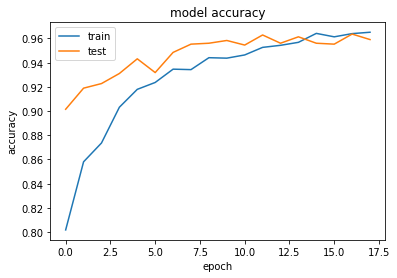

In [224]:

%matplotlib inline

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



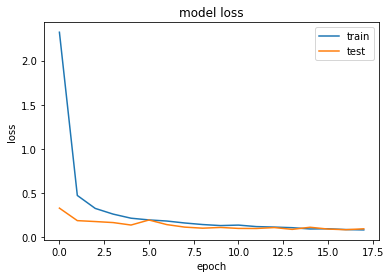

In [226]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [227]:
#Performance scores 

print("f1_score:",f1_score(Ytest,model.predict_classes(x_test),))
print("recall:",recall_score(Ytest,model.predict_classes(x_test),))
print("Validation Loss:",score[0])
print("Validation Accuracy:",score[1])

f1_score: 0.8439306358381502
recall: 0.7564766839378239
Validation Loss: 0.09384690803108793
Validation Accuracy: 0.9590908885002136


In [232]:
#Model Summary

from keras.utils import np_utils, print_summary
print_summary(model)  

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 17, 4, 32)         320       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 15, 2, 64)         18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 1, 64)          0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 7, 1, 64)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 448)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               57472     
_________________________________________________________________
dropout_18 (Dropout)         (None, 128)             

In [235]:
model.save('credicxo_task_musk_Non-musk.h5')